<a href="https://colab.research.google.com/github/zhangminxi-bit/ECON3916/blob/main/ECON3612_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.5


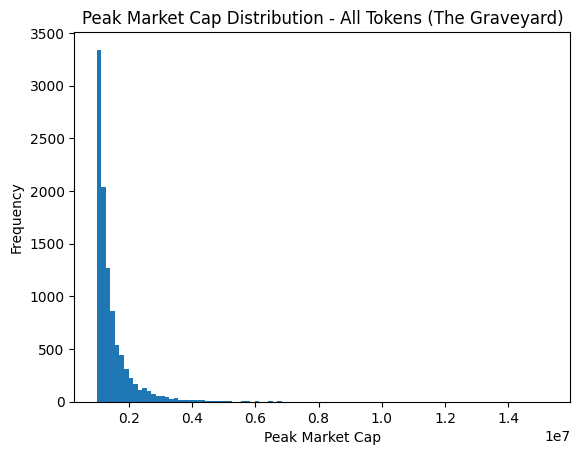

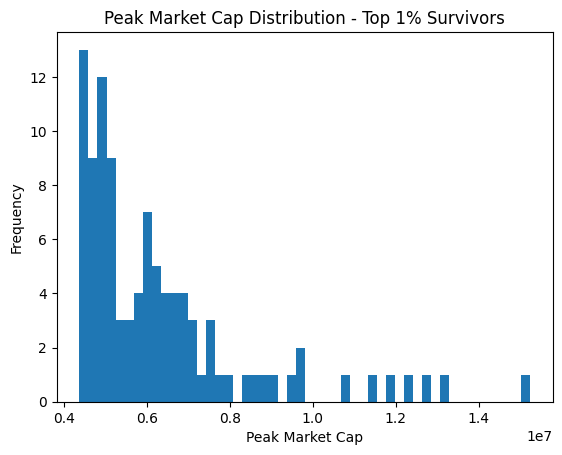

Mean Market Cap (All Tokens): 1480635.3798643823
Mean Market Cap (Top 1% Survivors): 6327316.694292533
Survivorship Bias Multiplier: 4.273379375057267


In [16]:
#Phase 1

from re import S
# Manual DGP Simulation
import numpy as np
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

def calculate_mad(data):

  # 1. Calculate the Median of the data
  sorted_data = sorted(data)
  median = sorted_data[int(len(sorted_data)/2)]
  # 2. Calculate Absolute Deviations (|x - median|)
  absolute_deviations = [abs(x - median) for x in sorted_data]
  # 3. Return the Median of those deviations
  deviations_median = absolute_deviations[int(len(absolute_deviations)/2)]

  return deviations_median

  #Analysis: SD explodes because it quadruples the deviations when they are doubled, so SD increases exponentially; however, MAD only increases linearly when there is an increase in deviations.

#Phase 2

def bayesian_audit(prior, sensitivity=0.98, specificity=0.98):

  # The following lines are now redundant as default values are set in the function signature
  # sensitivity = 0.98
  # specificity = 0.98

  false_positive_rate = 1 - specificity
  numerator = sensitivity * prior
  denominator = numerator + false_positive_rate * (1 - prior)
  bayesian_probability = numerator / denominator

  return bayesian_probability

#Phase 3

observed = np.array([50250, 49750])
expected = np.array([50000, 50000])

chi_square = np.sum((observed - expected)**2 / expected)

print(chi_square)

#Since the chi square is 2.5 and is smaller than 3.4; therefore, the experiment is valid and is not crashed

#Phase 4

# Financial Data Scientist Simulation: Survivorship Bias in Crypto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Parameters ---
np.random.seed(42)
n_tokens = 10000

# --- Generate Peak Market Cap using Pareto (Power Law) ---
# Shape parameter (alpha). Larger alpha -> more mass near zero.
alpha = 3.0
scale = 1e6  # Base scale (e.g., $1M baseline unit)

pareto_samples = (np.random.pareto(alpha, n_tokens) + 1) * scale

# --- Create Full Dataset (The Graveyard) ---
df_all = pd.DataFrame({
    "Peak Market Cap": pareto_samples
})

# --- Select Top 1% Survivors ---
threshold = np.percentile(df_all["Peak Market Cap"], 99)
df_survivors = df_all[df_all["Peak Market Cap"] >= threshold]

# --- Plot Histogram: All Tokens ---
plt.figure()
plt.hist(df_all["Peak Market Cap"], bins=100)
plt.title("Peak Market Cap Distribution - All Tokens (The Graveyard)")
plt.xlabel("Peak Market Cap")
plt.ylabel("Frequency")
plt.show()

# --- Plot Histogram: Survivors Only ---
plt.figure()
plt.hist(df_survivors["Peak Market Cap"], bins=50)
plt.title("Peak Market Cap Distribution - Top 1% Survivors")
plt.xlabel("Peak Market Cap")
plt.ylabel("Frequency")
plt.show()

# --- Evaluate Survivorship Bias ---
mean_all = df_all["Peak Market Cap"].mean()
mean_survivors = df_survivors["Peak Market Cap"].mean()

print("Mean Market Cap (All Tokens):", mean_all)
print("Mean Market Cap (Top 1% Survivors):", mean_survivors)
print("Survivorship Bias Multiplier:", mean_survivors / mean_all)